In [20]:
# for basins where zbedrock is not calibrated, what will happen is zbedrock is reduced for calibrated parameter sets?
# compare raw Zbedrock and low Zbedrock
# raw zbedrock is larger than 40 meters


In [2]:
import pandas as pd
import numpy as np
import os, sys, glob
import matplotlib.pyplot as plt

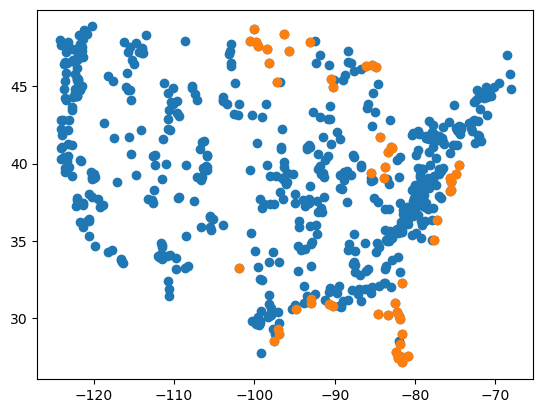

In [3]:
# basin info
file = '/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/CAMELS_level1_basin_info.csv'
df_info = pd.read_csv(file)

sel_id = np.array([ 30,  40,  41,  42,  43,  44,  45,  94, 107, 129, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 207,
       208, 218, 243, 244, 255, 258, 259, 260, 261, 270, 271, 272, 273,
       274, 275, 277, 279, 281, 335, 336, 338, 403, 404, 405, 406, 412,
       414, 426, 428, 434])


# plot locations
lat = df_info['lat_cen'].values
lon = df_info['lon_cen'].values
plt.scatter(lon, lat)
plt.scatter(lon[sel_id], lat[sel_id])
plt.show()

# Load metrics

In [25]:
dfall = []

zb = [0.5, 1, 3, 5]

kgeall = np.nan * np.zeros([len(sel_id), len(zb)+1])

for j in range(len(sel_id)):
    b = sel_id[j]
    dfb = []
    
    for i in range(len(zb)):
        z = zb[i]
        filebz = glob.glob(f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{b}_MOASMOcalib/ctsm_outputs_LowZbedrock/*_zb{z}/evaluation_many_metrics.csv')

        if not len(filebz)==1:
            print('error')

        else:
            filebz = filebz[0]
            df1 = pd.read_csv(filebz)
            df1['basin'] = b
            df1['Zbedrock'] = z
            dfb.append(df1)

            kgeall[j, i] = df1['kge'].values[0]

    # raw zb
    filebzr = filebz.replace('_LowZbedrock', '_emutest')
    filebzr = filebzr.replace(f'_zb{z}', '')
    df2 = pd.read_csv(filebzr)
    df2['basin'] = b
    df2['Zbedrock'] = 'raw'
    kgeall[j, i+1] = df2['kge'].values[0]
    
    dfb.append(df2)
    dfall.append(pd.concat(dfb))

dfall = pd.concat(dfall)

# compare kge

In [35]:
kge1 = np.nanmax(kgeall[:,:4], axis=1)
kge2 = kgeall[:,4]
print('max low KGE from zbedrock=0.5, 1, 3, 5', np.nanmedian(kge1),)
print('KGE from raw zbedrock>40 meters', np.nanmedian(kge2))

max low KGE from zbedrock=0.5, 1, 3, 5 0.600053020878051
KGE from raw zbedrock>40 meters 0.6285038773838512


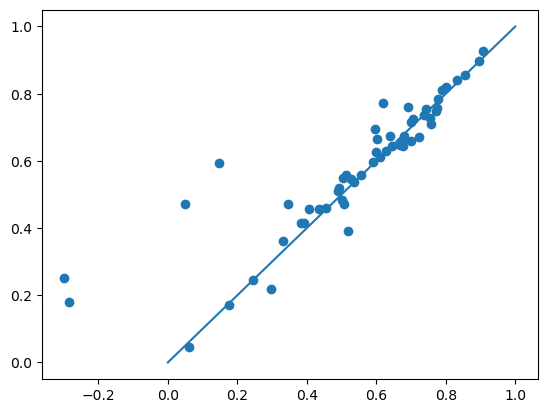

In [37]:
plt.scatter(kge1, kge2)
plt.plot([0, 1], [0, 1])